In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **Logistic Regression**
Logistic Regression (also called Logit Regression) is commonly used to estimate the probability that an instance belongs to a particular class (e.g., what is the probability that this email is spam?).

If the estimated probability is greater than 50%, then the model predicts that the instance belongs to that class (called the positive class, labeled “1”), or else it predicts that it does not (i.e., it belongs to the negative class, labeled “0”).

Thus it acts as a binary classifier.

## **Logistic Regression Estimates Probabilities**
Just like a Linear Regression model, a Logistic Regression model computes a weighted sum of the input features (plus a bias term), but instead
of outputting the result directly like the Linear Regression model does, it outputs the
logistic of this result using the below equation.

<img src= 'https://drive.google.com/uc?id=1hbLaDnu_VK9ty7pHsdntF1blWO5lDGMH' width="200" height="50" />

The logistic—noted σ(·)—is a sigmoid function (i.e., S-shaped) that outputs a number between 0 and 1.

The equation for the sigmoid function is shown below:

<img src='https://drive.google.com/uc?id=1WKmzg7K6ruqtfvXxUsjD7avDJ-OtVNZP' width="200" height="50" />

The graphic visualization of logistic function is shown below:

<img src='https://drive.google.com/uc?id=11d98CvkD_5KwALu0XGoWe8yaNSkkcoWO' width="400" height="200" />

Once the Logistic Regression model has estimated the probability $p = h_{ϴ}(x)$ that an instance x belongs to the positive class, it can make its prediction ŷ easily as shown below:

<img src='https://drive.google.com/uc?id=1g-jGDE3FQCetU0oCeVqePx2DXul1dQaT' width="200" height="50" />

## **Training a Logistic Regression Model using Gradient Descent**

We know that Logistic Regression model estimates probabilities and makes class predictions on the basis of whether the probability crosses the threshold of 0.5 or not.

However the model has to be first trained. The objective of the training is to set the parameter vector $\theta$ (or $w$) so that the model estimates high probability for positive instances ($y=1$) and low probabilities for negative instances ($y=0$).

This is done by using Gradient Descent (or some other optimization algorithm) to minimize the following cost function (log loss function):

<img src='https://drive.google.com/uc?id=1JcyYLHlBP6Y2rk8Akhq6_GRjyXmuh290' width="250" height="100" />

# Lab 3: Implementing and Training a Logistic Regression Model to do Binary Classification:
**Problem Statement 1:** Build and train a Logistic Regression Model to do binary classification of iris flowers using the iris dataset. In particular, the model should predict whether a particular iris flower instance belongs to the class Iris Virginica or not using only *petal width* as the input feature.


(***Note:*** Iris dataset is a famous dataset that contains sepal and petal length and width of 150 iris flowers of three different species: Iris-Setosta, Iris-Versicolor, and Iris-Virginica. See the figure below:)

<img src='https://drive.google.com/uc?id=1oPhE9S25n6BsGdsJGMETwfLaMKU9q-Pf' width="350" height="200"/>

In [ ]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
print(type(iris))
print(list(iris.keys()))
X = iris["data"][:,3:] # petal width
y = (iris["target"] == 2).astype(np.int64) # 1 if Iris-Virginica, else 0


<class 'sklearn.utils._bunch.Bunch'>
['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']


Training the Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X,y)

LogisticRegression(random_state=42)

A look at the model's estimated probabilities for flowers with petal widths varying from 0 to 3 cm

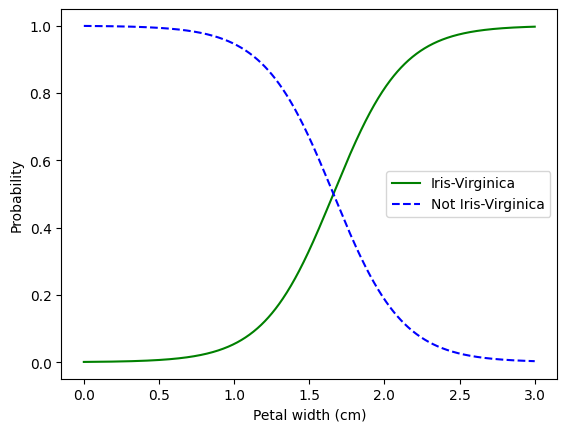

In [ ]:
import matplotlib.pyplot as plt

X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1],"g-")
plt.plot(X_new, y_proba[:,0], "b--")
plt.xlabel('Petal width (cm)')
plt.ylabel('Probability')
plt.legend(['Iris-Virginica','Not Iris-Virginica'])

The petal width of Iris-Virginica flowers (represented by triangles) ranges from 1.4
cm to 2.5 cm, while the other iris flowers (represented by squares) generally have a
smaller petal width, ranging from 0.1 cm to 1.8 cm.

There is a bit of overlap. Above about 2 cm the classifier is highly confident that the flower is an Iris-Virginica (it outputs a high probability to that class), while below 1 cm it is highly confident that it is not an Iris-Virginica (high probability for the “Not Iris-Virginica” class). In between these extremes, the classifier is unsure.

There is a decision boundary at around 1.6 cm where both probabilities are equal to 50%: if the petal width is higher than 1.6 cm, the classifier will predict that the flower is an Iris-Virginica, or else it will predict that it is not (even if it is not very confident):

In [ ]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

**Problem Statement 2:** Logistic Regression for predicting class using two features: Petal length and width.

Below we use the same dataset but use two features: petal width and petal length to train the Logistic Regression model to estimate the probability that a new flower is an Iris-Virginica based on these two features.

The dashed line represents the points where the model estimates a 50% probability. This is the models decision boundary. Note that it is a linear boundary.

Each parallel line represents the
points where the model outputs a specific probability, from 15% (bottom left) to 90%
(top right). All the flowers beyond the top-right line have an over 90% chance of
being Iris-Virginica according to the model.


(100000, 2)


(2.9, 7.0, 0.8, 2.7)

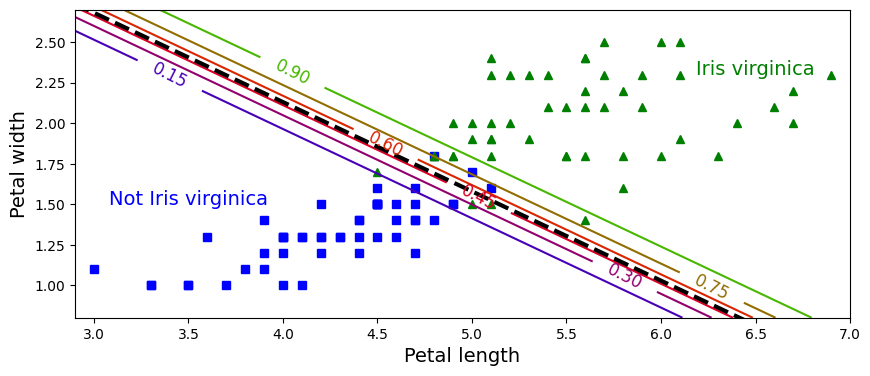

In [ ]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int64)

log_reg2 = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg2.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
print(X_new.shape)

y_proba = log_reg2.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg2.coef_[0][0] * left_right + log_reg2.intercept_[0]) / log_reg2.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])